# Gender and Mean Suicide Rates in Canada
### Group 11 Final Report
##### Group Members: 
Aaron Cui (94952777)
<br>Aditya Goel (84874379)
<br>Jialu Jin (24403594)
<br>Yirui Wang (27719509)

### Introduction


Suicide is a prevalent cause of death in Canada, accounting for 1.2% of all deaths in the year 2020 (Elflein, 2020). Past research has led us to believe that there may be differences in suicide rates between men and women, therefore we are interested in further studying this phenomenon (Freeman et al., 2017). As a result, our research question for this project is: **what were the mean suicide rates of males and females in Canada between 1985 and 2013?** We will be using the "Suicide Rates Overview 1985 to 2016" (Rusty, 2018) dataset sourced from Kaggle for our analysis, focusing only on the data relevant to Canada. This dataset has 12 columns and 27820 rows. Different columns are different response variables accross the socio-economic spectrum that might affect the suicide rates globally. Finally, the number of suicides per 100,000 people (essentially the suicide rate) will be our response variable, mean the location parameter, and standard deviation the scale parameter. We decided to use mean as it gives a good sense of the center of the data while standard deviation helps us understand the spread; ultimately helping us evaluate the error in our results. 

### Methods & Results
#### Preliminary Results

In [1]:
# loading all the necessary libraries
library(infer)
library(repr)
library(tidyverse)
library(readxl)
library(digest)
library(dplyr)
library(tidymodels)
library(GGally)
library(RCurl)
library(ggplot2)
library(ggmosaic)

# setting the maximum rows to be displayed to 6
options(repr.matrix.max.rows = 6)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.1
✔ modeldata    1.0.1     ✔ workflows    1.1.0
✔ parsnip      1.0.2     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::f

We downloaded the dataset from the web and put it in our repository in the data folder.

In [2]:
# loading the data from the data folder and displaying the head (first 6 rows)
# the data was downloaded from the following link: "https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016"
suicide_data <- read.csv("https://raw.githubusercontent.com/agoel25/stat_201_group_11/main/data/master.csv")
head(suicide_data)

,country,year,sex,age,suicides_no,population,suicides.100k.pop,country.year,HDI.for.year,gdp_for_year....,gdp_per_capita....,generation
,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NA,"2,156,624,900",796,Generation X
2,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NA,"2,156,624,900",796,Silent
3,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NA,"2,156,624,900",796,Generation X
4,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NA,"2,156,624,900",796,G.I. Generation
5,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NA,"2,156,624,900",796,Boomers
6,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NA,"2,156,624,900",796,G.I. Generation


We cleaned and wrangled the data by filtering only Canada and selecting "sex", "year", "age" and "suicides.100k.pop" columns. 

In [3]:
# filtering for Canada (as our question specifically focuses on Canada) and selecting the appropriate columns
suicide_sample <- suicide_data %>%
                  filter(country %in% c("Canada")) %>%
                  select(sex, year, age, suicides.100k.pop)
suicide_sample

sex,year,age,suicides.100k.pop
<chr>,<int>,<chr>,<dbl>
male,1985,75+ years,28.45
male,1985,55-74 years,27.27
male,1985,25-34 years,27.00
⋮,⋮,⋮,⋮
female,2013,75+ years,4.61
female,2013,5-14 years,1.10
male,2013,5-14 years,0.78


- We plot a boxplot of number of suicides per 100k population for different sex.
- We also plot a histogram of Sample distribution of number of suicides per 100k population in Canada for 2 sex groups.
- From the boxplot, we can see that the boxplots of two genders don't even overlap. Also, from the histogram, the sample distribution varies a lot for different genders. So we think this might indicate that there is a difference of the mean number of suicides per 100k population for two genders.

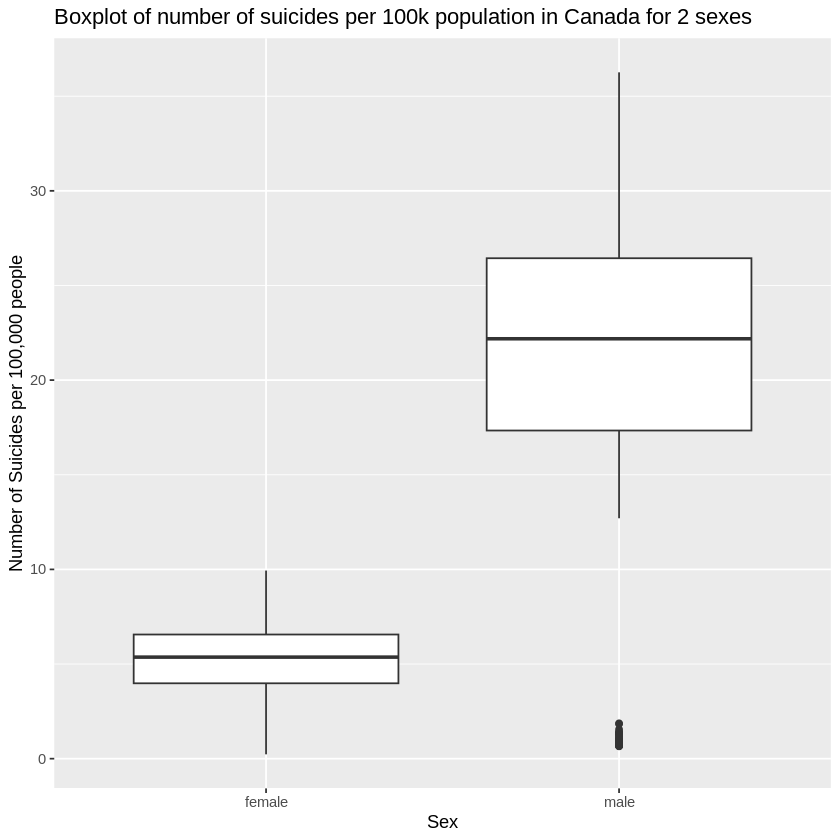

In [4]:
# plotting the boxplot of suicides per 100k population for males and females
boxplot <- suicide_sample %>%
    ggplot(aes(sex, suicides.100k.pop)) + 
    geom_boxplot() +
    ggtitle("Boxplot of number of suicides per 100k population in Canada for 2 sexes") +
    xlab("Sex") +
    ylab("Number of Suicides per 100,000 people")
boxplot

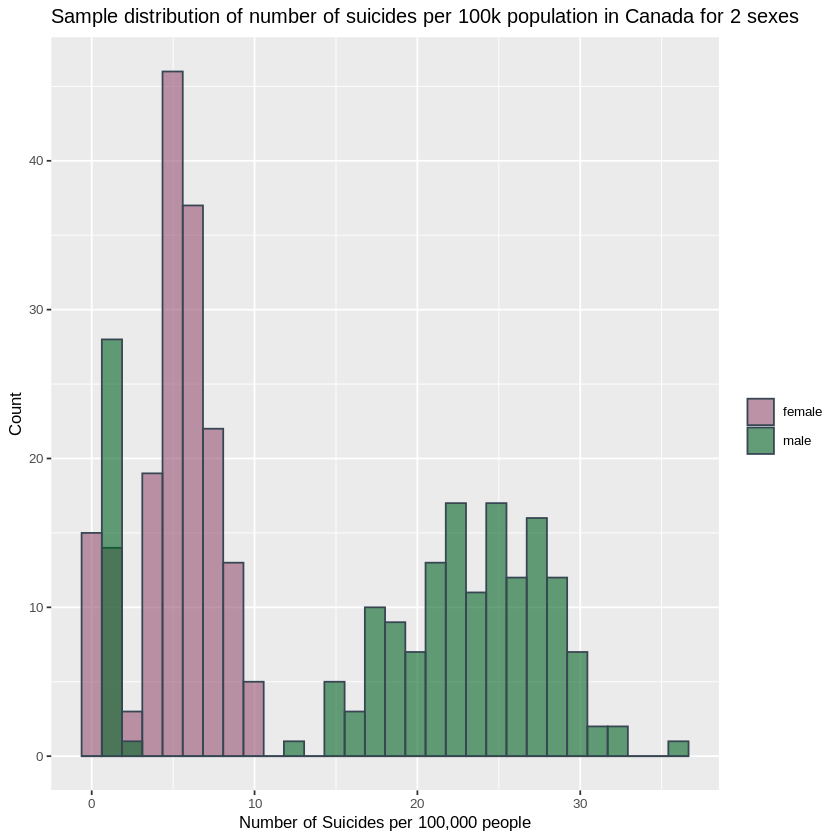

In [5]:
# plotting the sample distribution of suicides per 100k population for males and females
histogram <- suicide_sample %>%
    ggplot(aes(x = suicides.100k.pop, fill = sex)) +
    geom_histogram(bins=30, color="#374652", alpha=0.6, position = 'identity') +
    scale_fill_manual(values=c("#985473", "#036425")) +
    ggtitle("Sample distribution of number of suicides per 100k population in Canada for 2 sexes")+
    xlab("Number of Suicides per 100,000 people") +
    ylab("Count") +
    labs(fill="") +
    theme(text = element_text(size = 10))
histogram

The following is the summary statistics (sample means of suicide rates for females and males). We can clearly see that the mean suicide rates of males is higher than females. 

In [6]:
# calculating the point estimates from our sample for the 2 population groups, that is 
# calculating the mean suicide rates for males and females in Canada
summary <- suicide_sample%>%
        group_by(sex) %>%
        summarize(mean = mean(suicides.100k.pop))
summary

sex,mean
<chr>,<dbl>
female,5.113161
male,19.822011


#### Hypothesis test
- using bootstrapping method

In [14]:
# setting seed to ensure reproducibility
set.seed(123)
# take 1000 bootstrap samples and calculate the difference in means for each sample
bootstrap_dist <- 
    suicide_sample %>% 
    specify(formula = suicides.100k.pop ~ sex) %>% 
    generate(reps = 1000, type = "bootstrap") %>% 
    calculate(stat = "diff in means", order = c("male", "female")) 
bootstrap_dist

replicate,stat
<int>,<dbl>
1,15.85483
2,13.85279
3,14.11451
⋮,⋮
998,13.91992
999,13.86361
1000,14.70881


In [15]:
# calculate the observed test statistic
obs_test_stat <- suicide_sample %>% 
        specify(formula = suicides.100k.pop ~ sex) %>% 
        calculate(stat = "diff in means", order = c("male", "female")) %>%
        pull()
obs_test_stat

[1] 14.70885

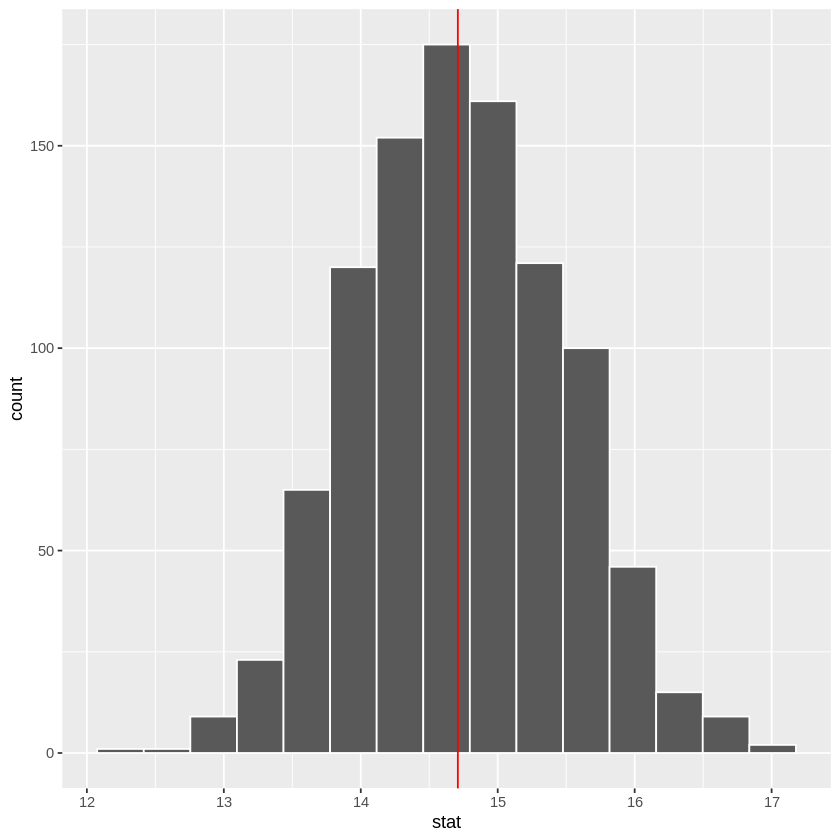

In [16]:
# plot the bootstrap distribution with a red vertical line indicating the observed test statistic
bootstrap_dist_plot <-
    bootstrap_dist %>%
    ggplot() +
    geom_histogram(aes(x=stat), bins = 15, color="white") +
    geom_vline(xintercept = obs_test_stat, color = "red") 
bootstrap_dist_plot

In [17]:
# adjust the center of our bootstrap distribution to 0 and call it null_dist
null_dist <- 
     bootstrap_dist %>%
     mutate(stat=stat-(obs_test_stat-0))

In [18]:
# compute the p-value
pvalue <- 
    null_dist %>% 
    get_p_value(obs_stat = obs_test_stat, direction = "right")
pvalue

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Warning message in min(diff(unique_loc)):
“no non-missing arguments to min; returning Inf”


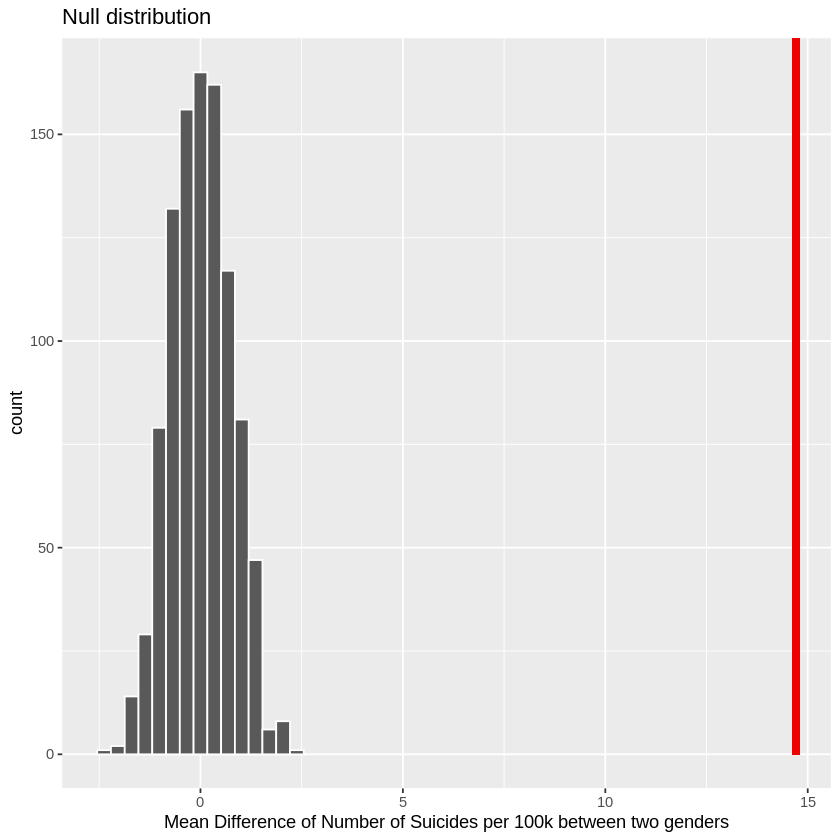

In [19]:
# visualize the null distribution with a vertical line indicating the observed test statistic
visualize_null_dist_p <- 
    visualize(null_dist) + 
    shade_p_value(obs_stat = obs_test_stat, direction = "right") +
    xlab("Mean Difference of Number of Suicides per 100k between two genders") +
    ggtitle("Null distribution")
visualize_null_dist_p

- using asymptotics method(two-sample t test)

In [20]:
# use built-in method t.test in R to conduct a two sample t test 
test_summary <- tidy(
        t.test(x = suicide_sample%>% 
                   filter(sex == "male") %>%
                   pull(suicides.100k.pop),
               y = suicide_sample%>% 
                   filter(sex == "female") %>%
                   pull(suicides.100k.pop),
               alternative = "greater"))
test_summary

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
14.70885,19.82201,5.113161,20.11646,5.37673e-50,197.4708,13.50049,Inf,Welch Two Sample t-test,greater


#### Methods: Plan

This report compares the differences of suicide rate in Canada from 1985 and 2013, it focuses on the gender and has a wide time period ranging from 1985 to 2013. It’s trustworthy because the hypothesis is tested in a straightforward way of deriving estimates. Plus, the sample we are using is relatively large so the result we get will be reliable. However, if we don’t use the bootstrapping method and the asymptotic analysis to verify the hypothesis, the result we get would be susceptible to outliers or other facts.

Even though we clearly see a difference in the mean suicide rates (males showing much higher suicde rates than females) we cannot yet be certain about whether this difference is because of actual distinction between the suicide rates or if its simply a result of sampling variation. Hence, we will be using hypothesis tests to get better more reliable conclusion to our question. We expect to find the extent to which the suicide rates vary between males and females in Canada using their mean and standard deviation. Our prediction is that males do have higher suicide rates then females as can be seen in our priliminary results and previous research studies (Freeman et al., 2017).

However, this report is only a proposal, the final report will dive into many more details and give more concrete answers to the question which are less prone to erroneous interpretations using confidence intervals and hypothesis tests. An impact of actually finding a difference in suicide rates could help in focusing extra resources in studying the causes of such differences and possibly mitigating them to avoid loss of life. Henceforth, some future questions which this could lead to are: What are the causes of this difference in suicide rates? What can be done to avoid so many more males from committing suicide? 

### Discussion

### References

1. Rusty. “Suicide Rates Overview 1985 to 2016e.” Kaggle, 1 Dec. 2018, https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016.   

2. Freeman, Aislinné et al. “A Cross-National Study on Gender Differences in Suicide Intent - BMC Psychiatry.” BioMed Central, BioMed Central, 29 June 2017, https://bmcpsychiatry.biomedcentral.com/articles/10.1186/s12888-017-1398-8.  

3. Elflein, John. “Distribution of Deaths Canada by Cause 2020.” Statista, 4 Mar. 2022, https://www.statista.com/statistics/437880/proportion-of-deaths-in-canada-by-disease/#:~:text=However%2C%20the%20leading%20causes%20of,43.9%20percent%20of%20all%20deaths.   
